# **Cirrhosis Patient Survival Prediction**

## **Dataset Information**
**Untuk tujuan apa kumpulan data tersebut dibuat?**

Sirosis terjadi akibat kerusakan hati yang berkepanjangan, yang menyebabkan jaringan parut yang luas, sering kali disebabkan oleh kondisi seperti hepatitis atau konsumsi alkohol kronis. Data yang diberikan bersumber dari studi Mayo Clinic tentang sirosis bilier primer (PBC) pada hati yang dilakukan dari tahun 1974 hingga 1984.

**Siapa yang mendanai pembuatan kumpulan data tersebut?**

Mayo Clinic

**Apa yang direpresentasikan oleh contoh-contoh dalam kumpulan data ini?**

Orang

**Apakah kumpulan data tersebut berisi data yang mungkin dianggap sensitif dalam hal apa pun?**

Jenis Kelamin, Usia

**Informasi Tambahan**

Selama tahun 1974 hingga 1984, 424 pasien PBC yang dirujuk ke Klinik Mayo memenuhi syarat untuk uji coba terkontrol plasebo acak yang menguji obat D-penisilamina. Dari jumlah tersebut, 312 pasien awal ikut serta dalam uji coba dan sebagian besar memiliki data yang komprehensif. Sebanyak 112 pasien yang tersisa tidak bergabung dalam uji klinis tetapi setuju untuk mencatat metrik dasar dan menjalani pelacakan kelangsungan hidup. Enam dari pasien ini segera tidak dapat dilacak setelah diagnosis mereka, sehingga menyisakan data untuk 106 orang ini selain 312 orang yang menjadi bagian dari uji coba acak.

## **Dataset Yang Digunakan**
Yang di import ke Pyhton

In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.features 
y = cirrhosis_patient_survival_prediction.data.targets 
  
# metadata 
print(cirrhosis_patient_survival_prediction.metadata) 
  
# variable information 
print(cirrhosis_patient_survival_prediction.variables) 


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

## **Data Understanding**

Menampilkan Data mulai dari Features, Feature Type, Dataset yang bejenis Tabular, dll.

In [3]:
import pandas as pd

# Menampilkan beberapa baris awal
print(X.head())

# Menampilkan info kolom
print(X.info())

# Menampilkan distribusi target
print(y.value_counts())

# Cek deskripsi statistik
print(X.describe(include='all'))


              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage  
0         12.2    4.0  
1         10.6    3.0  
2 

## **PreProcessing**

Tahap preprocessing dilakukan untuk membersihkan dan mempersiapkan data sebelum digunakan dalam proses pemodelan machine learning. Proses ini mencakup penanganan missing value dengan metode imputasi, baik untuk data numerik (menggunakan median) maupun data kategorikal (menggunakan modus). Selanjutnya, data kategorikal diubah menjadi bentuk numerik menggunakan Label Encoding, agar dapat dipahami oleh algoritma machine learning. Terakhir, fitur numerik dinormalisasi menggunakan StandardScaler untuk menyamakan skala antar fitur, karena KNN sangat sensitif terhadap perbedaan skala. Dengan preprocessing ini, data menjadi lebih bersih, konsisten, dan siap digunakan untuk pelatihan model

In [4]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Ambil data dari ucimlrepo
data_cirrhosis = fetch_ucirepo(id=878)
X = data_cirrhosis.data.features
y = data_cirrhosis.data.targets

# Gabungkan fitur dan target
data = pd.concat([X, y], axis=1)

# Identifikasi kolom numerik dan kategorikal
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Imputasi nilai kosong
imputer_num = SimpleImputer(strategy='median')
data[num_cols] = imputer_num.fit_transform(data[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

# Encoding data kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Pisahkan kembali X dan y
X = data.drop(columns='Status')
y = data['Status']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# 1. Menampilkan jumlah missing values sebelum preprocessing
print("Jumlah Missing Values Sebelum Preprocessing:")
print(data.isnull().sum())

# 2. Menampilkan contoh data sebelum dan setelah imputasi
print("\nContoh Data Sebelum Imputasi:")
print(data.head())

# 3. Melakukan imputasi dan encoding (sudah dilakukan sebelumnya)
# (Jika sudah dilakukan, kita akan tampilkan lagi untuk memastikan)
print("\nJumlah Missing Values Setelah Preprocessing:")
print(data.isnull().sum())

# 4. Menampilkan data yang sudah diproses (encoding, scaling)
print("\nContoh Data Setelah Preprocessing:")
print(data.head())

# 5. Deskripsi statistik untuk melihat sebaran data numerik
print("\nDeskripsi Statistik Data Setelah Preprocessing:")
print(data.describe())


Jumlah Missing Values Sebelum Preprocessing:
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

Contoh Data Sebelum Imputasi:
   Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0     0  21464.0    0        2             2        2      2       14.5   
1     0  20617.0    0        0             2        2      0        1.1   
2     0  25594.0    1        0             0        0      1        1.4   
3     0  19994.0    0        0             2        2      1        1.8   
4     2  13918.0    0        0             2        2      0        3.4   

   Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0           68     2.60      38    1718

**Penjelasan Output yang Ditampilkan:**

**Jumlah Missing Values:**

Sebelum dan sesudah preprocessing, kita bisa memastikan bahwa data sudah lengkap tanpa nilai yang hilang.

**Contoh Data Sebelum dan Sesudah Imputasi:**

Memastikan apakah nilai kosong telah diisi dengan benar.

**Deskripsi Statistik:**

Memberikan gambaran umum tentang distribusi data numerik setelah preprocessing (misalnya, rata-rata, standar deviasi, dan range dari setiap kolom).

**Hasil yang Akan Dicetak:**

Jumlah missing values pada setiap kolom.

Sebuah preview dari data yang sudah diimputasi dan di-encode.

Statistik deskriptif untuk memeriksa apakah fitur numerik sudah normal.

## **Permodelan**
Setelah data selesai diproses, dilakukan tahap pemodelan dengan menggunakan algoritma K-Nearest Neighbors (KNN). Data dibagi menjadi dua bagian, yaitu data latih dan data uji, agar model dapat dilatih terlebih dahulu sebelum diuji performanya. Model KNN dilatih pada data latih, dan hasil prediksi diuji terhadap data uji. Evaluasi performa dilakukan menggunakan confusion matrix, classification report, dan nilai akurasi. Hasil evaluasi ini membantu memahami seberapa baik model dalam mengklasifikasikan status pasien sirosis, serta memberi gambaran apakah model tersebut layak digunakan atau perlu perbaikan. Pemisahan antara preprocessing dan pemodelan juga memberikan fleksibilitas jika ingin mencoba model lain tanpa mengulang proses pembersihan data.

Index(['Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')
    Status
0        D
1        C
2        D
3        D
4       CL
..     ...
413      D
414      C
415      C
416      C
417      C

[418 rows x 1 columns]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


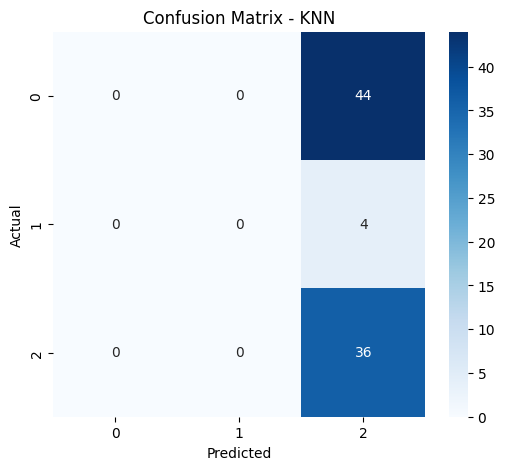


📄 Classification Report:
               precision    recall  f1-score   support

           C       0.00      0.00      0.00        44
          CL       0.00      0.00      0.00         4
           D       0.43      1.00      0.60        36

    accuracy                           0.43        84
   macro avg       0.14      0.33      0.20        84
weighted avg       0.18      0.43      0.26        84

✅ Akurasi: 0.42857142857142855


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.impute import SimpleImputer  # Untuk imputasi missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# Memisahkan data fitur (X) dan target (y)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# Menampilkan kolom-kolom dari fitur dan target
print(X.columns)
print(y)

# Encoding kolom kategorikal (contoh untuk 'Sex', 'Ascites', 'Hepatomegaly' dll)
# Gunakan pd.get_dummies() untuk kolom kategorikal
X = pd.get_dummies(X, drop_first=True)

# Imputasi missing values
imputer = SimpleImputer(strategy='mean')  # Menggunakan mean untuk menggantikan NaN
X = imputer.fit_transform(X)  # Imputasi pada data fitur

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Mendefinisikan dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Menentukan jumlah tetangga (k)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Classification Report & Akurasi
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Akurasi:", accuracy_score(y_test, y_pred))


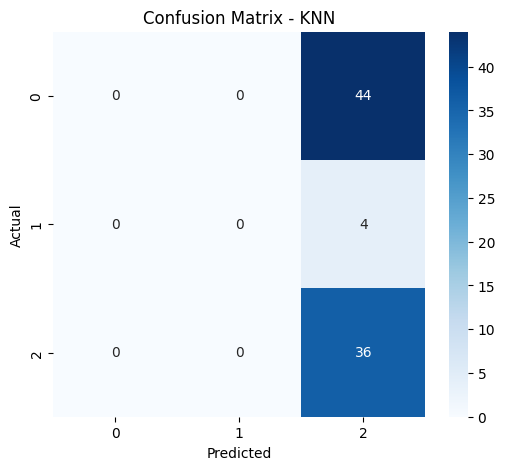


📄 Classification Report:
               precision    recall  f1-score   support

           C       0.00      0.00      0.00        44
          CL       0.00      0.00      0.00         4
           D       0.43      1.00      0.60        36

    accuracy                           0.43        84
   macro avg       0.14      0.33      0.20        84
weighted avg       0.18      0.43      0.26        84

✅ Akurasi: 0.42857142857142855


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Prediksi
y_pred = knn.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Classification Report & Akurasi
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Akurasi:", accuracy_score(y_test, y_pred))


## **Evaluasi**
**1. Jumlah Missing Values:**

Sebelum preprocessing, kita dapat memeriksa kolom mana yang masih memiliki nilai kosong.

Setelah preprocessing, kita pastikan tidak ada lagi nilai kosong (atau sudah terisi dengan metode imputasi yang sesuai).

**2. Contoh Data:**

Kita bisa memastikan bahwa imputasi dan encoding sudah berjalan dengan baik dengan melihat beberapa baris data yang sudah diproses.

**3. Deskripsi Statistik:**

Dengan melihat statistik numerik (seperti mean, standar deviasi, min, max), kita bisa memastikan apakah fitur numerik sudah terdistribusi dengan baik dan siap untuk model.

**4. Confusion Matrix:**

Menunjukkan seberapa akurat model dalam memprediksi kelas pasien (misalnya, apakah model lebih banyak memprediksi 'Survived' atau 'Died').

**5. Classification Report:**

Menyediakan metrik per kelas seperti precision, recall, dan f1-score, yang memberikan gambaran lebih lengkap tentang performa model selain hanya akurasi.

**6. Akurasi:**

Mengukur seberapa banyak prediksi model yang benar dibandingkan dengan total prediksi.